In [24]:
import pandas as pd

In [25]:
import seaborn as sns
sns.set_palette('Set2')

In [26]:
df = pd.read_csv('datatran2020-worked.csv')

In [27]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,678.1,GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,-11.774602,-49.107450,SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178.0,NOVA IGUACU,Falta de Aten��o do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,-22.752230,-43.437910,SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,206.9,SAO JOSE,Ingest�o de �lcool,Colis�o lateral,...,0,1,0,1,2,-27.591935,-48.618246,SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236.0,CACOAL,Velocidade Incompat�vel,Sa�da de leito carro��vel,...,1,0,0,1,1,-11.446246,-61.437612,SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360.0,REBOUCAS,Ingest�o de �lcool,Capotamento,...,4,0,0,6,1,-25.675038,-50.750898,SR-PR,DEL7/3,UOP04/PR


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45368 entries, 0 to 45367
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      45368 non-null  float64
 1   data_inversa            45368 non-null  object 
 2   dia_semana              45368 non-null  object 
 3   horario                 45368 non-null  object 
 4   uf                      45368 non-null  object 
 5   br                      45253 non-null  float64
 6   km                      45253 non-null  float64
 7   municipio               45368 non-null  object 
 8   causa_acidente          45368 non-null  object 
 9   tipo_acidente           45368 non-null  object 
 10  classificacao_acidente  45368 non-null  object 
 11  fase_dia                45368 non-null  object 
 12  sentido_via             45368 non-null  object 
 13  condicao_metereologica  45368 non-null  object 
 14  tipo_pista              45368 non-null

In [29]:
df.isna().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        115
km                        115
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    0
delegacia                   0
uop                       399
dtype: int64

In [30]:
df.update(df[['br','km']].fillna('0'))
df.update(df[['uop']].fillna('nao cadastrado'))

In [31]:
df.pessoas.mean()

2.3008067360253923

In [32]:
acidentes = df[['pessoas','mortos','feridos_leves','ilesos','ignorados','veiculos','causa_acidente' ]].groupby(by = 'causa_acidente').sum().sort_values(by = 'mortos', ascending = False)

acidentes

,pessoas,mortos,feridos_leves,ilesos,ignorados,veiculos
causa_acidente,,,,,,
Falta de Aten��o � Condu��o,36548,860,14011,15398,2410,27388
Desobedi�ncia �s normas de tr�nsito pelo condutor,16422,599,5345,7029,1322,12312
Velocidade Incompat�vel,8766,517,3673,2779,563,5736
Falta de Aten��o do Pedestre,2836,403,549,977,415,1333
Ingest�o de �lcool,7941,225,2429,3862,596,5729
Ultrapassagem Indevida,2583,221,826,909,204,1622
Condutor Dormindo,3097,180,1379,973,121,1981
Desobedi�ncia �s normas de tr�nsito pelo pedestre,715,90,138,255,124,341
Defeito Mec�nico no Ve�culo,5206,87,2022,2501,216,3442


In [33]:
df.select_dtypes(include=['int64']).mean()


pessoas           2.300807
mortos            0.081048
feridos_leves     0.851658
feridos_graves    0.260999
ilesos            0.951023
ignorados         0.156079
feridos           1.112656
veiculos          1.626852
dtype: float64

In [34]:
df.groupby('causa_acidente').size().sort_values(ascending = False)

causa_acidente
Falta de Aten��o � Condu��o                                                       15899
Desobedi�ncia �s normas de tr�nsito pelo condutor                                  6251
Velocidade Incompat�vel                                                            4190
Ingest�o de �lcool                                                                 3662
Defeito Mec�nico no Ve�culo                                                        2729
N�o guardar dist�ncia de seguran�a                                                 2516
Condutor Dormindo                                                                  1494
Pista Escorregadia                                                                 1410
Falta de Aten��o do Pedestre                                                       1205
Animais na Pista                                                                   1072
Ultrapassagem Indevida                                                              790
Defeito na Via   

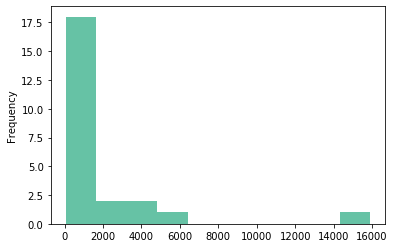

In [35]:
%matplotlib inline
df['causa_acidente'].value_counts().sort_values(ascending = False).plot.hist()

In [36]:
df.groupby('municipio').size().sort_values(ascending = False)[0:20]

municipio
BRASILIA                757
CURITIBA                700
SAO JOSE                456
GUARULHOS               452
PALHOCA                 426
SERRA                   377
DUQUE DE CAXIAS         373
BETIM                   373
PORTO VELHO             316
RECIFE                  300
SAO JOSE DOS PINHAIS    294
UBERLANDIA              272
CARIACICA               255
MARINGA                 236
CASCAVEL                231
TERESINA                227
JOAO PESSOA             226
LINHARES                225
UBERABA                 221
SAO PAULO               213
dtype: int64

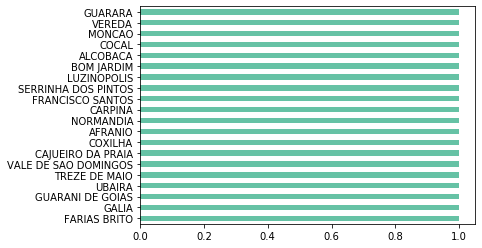

In [37]:
%matplotlib inline
df['municipio'].value_counts().sort_values(ascending = True)[0:20].plot.barh()


In [38]:
df.groupby('uf').size().sort_values(ascending = False)

uf
MG    5934
SC    5261
PR    5201
RS    3018
RJ    2982
SP    2844
BA    2479
GO    2336
PE    1827
ES    1796
MT    1561
RO    1113
CE    1084
MS    1058
PB     988
RN     935
PI     816
MA     780
DF     757
PA     717
AL     453
TO     418
SE     413
AC     213
RR     181
AM     102
AP     101
dtype: int64

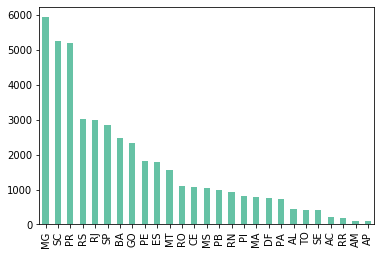

In [39]:
%matplotlib inline
df['uf'].value_counts().sort_values(ascending = False).plot.bar()

In [40]:
df.groupby('dia_semana').size().sort_values(ascending = False)


dia_semana
s�bado           7476
domingo          7436
sexta-feira      7043
segunda-feira    6092
quarta-feira     5923
quinta-feira     5772
ter�a-feira      5626
dtype: int64

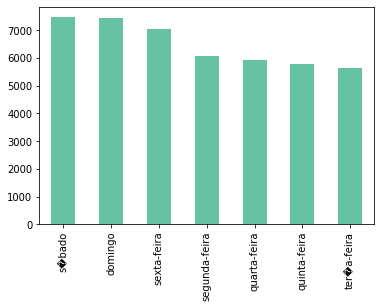

In [41]:
%matplotlib inline
df['dia_semana'].value_counts().sort_values(ascending = False).plot.bar()

In [42]:
df.groupby('tipo_pista').size().sort_values(ascending = False)


tipo_pista
Simples     23120
Dupla       18643
M�ltipla     3605
dtype: int64

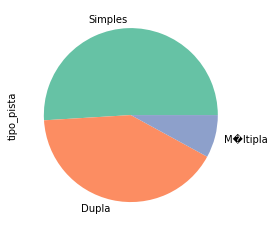

In [43]:
%matplotlib inline
df['tipo_pista'].value_counts().sort_values(ascending = False).plot.pie()